# **1)  Etude préalable : Comparaison des méthodes de clustering sur des données simulées**

In [ ]:
import pandas as pd # Importation des librairies utiles au code
import io
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

aggregation = pd.read_csv("/content/sample_data/aggregation.txt",sep= "\t") # Importation des fichiers .txt des données tests
jain = pd.read_csv("/content/sample_data/jain.txt",sep= "\t")
pathbased = pd.read_csv("/content/sample_data/pathbased.txt",sep= "\t")

## **Visualisation des nuages de points des données des fichiers**

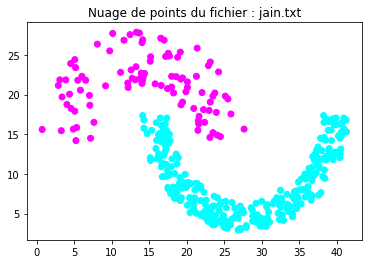

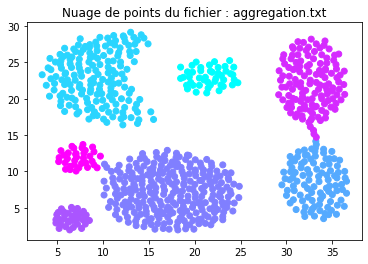

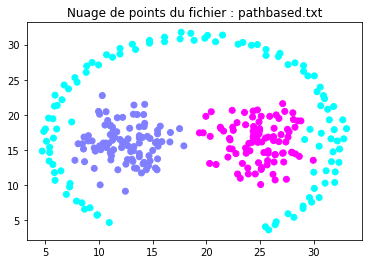

In [ ]:
jain_np = jain.to_numpy() # On affiche ici les nuages de points bruts avec en la coloration de ceux-ci en fonction de leur réel clustering affiché dans
                          # la 3eme colonne du fichier
plt.scatter(jain_np[:,0], jain_np [:,1], c=jain_np[:,2], cmap='cool')
plt.title("Nuage de points du fichier : jain.txt")
plt.show()

aggregation_np = aggregation.to_numpy()
plt.scatter(aggregation_np[:,0], aggregation_np [:,1], c=aggregation_np[:,2],cmap='cool')
plt.title("Nuage de points du fichier : aggregation.txt")
plt.show()

pathbased_np = pathbased.to_numpy()
plt.scatter(pathbased_np[:,0], pathbased_np [:,1], c=pathbased_np[:,2],cmap='cool')
plt.title("Nuage de points du fichier : pathbased.txt")
plt.show()

## **Clustering sur le fichier jain.txt**

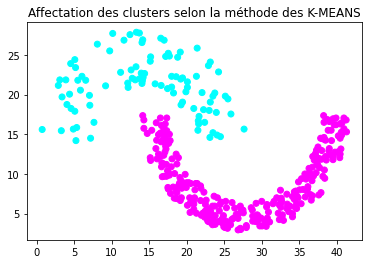

ARI : 1.0


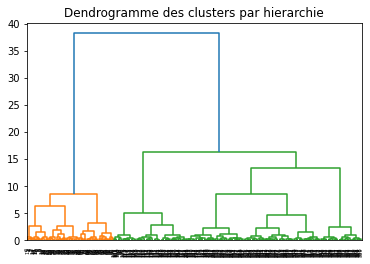

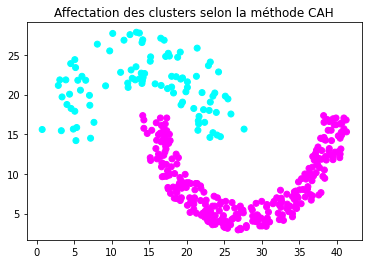

ARI : 1.0


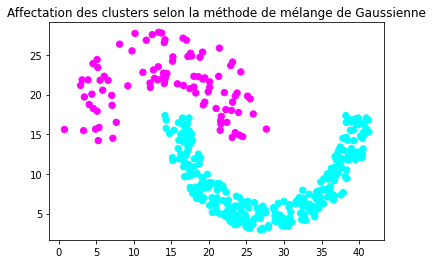

ARI : 1.0


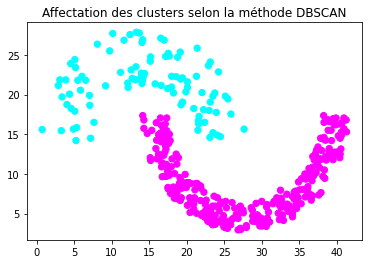

ARI : 1.0


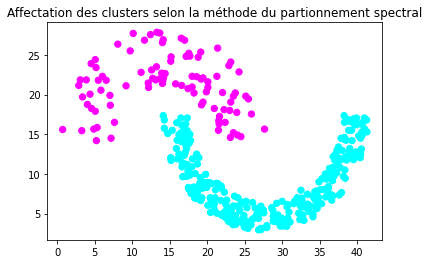

ARI : 1.0


In [ ]:
# On centre et réduit la matrice

Xj = jain_np
scalerXj = StandardScaler()
scalerXj.fit(Xj)                # pour mettre X dans scaler
Zj = scalerXj.transform(Xj)      # pour centrer et réduire
scalerZj = StandardScaler()
scalerZj.fit(Zj)                # on remplace X

# Parametres pour les fonctions de clustering pour jain.txt
nb_clusters_j = 2
t_j = 20
eps_j = 0.5

# Méthode de clustering KMeans

kmeans = KMeans(n_clusters=nb_clusters_j, init='random', n_init=1).fit(Zj)          # on définit le nombre de clusters à 2
affectation_cluster_j = kmeans.labels_
ARI = adjusted_rand_score(jain_np[:,2], affectation_cluster_j)
inertie = kmeans.inertia_
plt.scatter(jain_np[:,0], jain_np [:,1], c=affectation_cluster_j, cmap='cool')
plt.title ('Affectation des clusters selon la méthode des K-MEANS')
plt.show()
print ("ARI : " + str(ARI))

# Métode de clustering CAH

linkage1 = linkage (Zj, 'ward', 'euclidean', True)                          # on choisit la distance de Ward car plus précise
affectation_cluster_j_cah = fcluster (linkage1, t_j, criterion='distance')   # 20 représente le pas t auqeul on décide "couper" pour former les clusters
dendrogram (linkage1, color_threshold=t_j)
ARI = adjusted_rand_score(jain_np[:,2], affectation_cluster_j_cah)
plt.title ('Dendrogramme des clusters par hierarchie')                                   # 20 représente le pas t auqeul on décide "couper" pour former les clusters
plt.show()
plt.scatter(jain_np[:,0], jain_np [:,1], c=affectation_cluster_j_cah, cmap='cool')
plt.title ('Affectation des clusters selon la méthode CAH')
plt.show()
print ("ARI : " + str(ARI))

# Méthode de clustering modèle de mélange de Gaussienne

gm = GaussianMixture(n_components=nb_clusters_j).fit(Zj)
labels = gm.predict(Zj)
ARI = adjusted_rand_score(jain_np[:,2], labels)
plt.scatter(jain_np[:, 0], jain_np[:, 1], c=labels, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode de mélange de Gaussienne')
plt.show()
print ("ARI : " + str(ARI))

# Méthode de clustering DBSCAN

dbscan = DBSCAN(eps=eps_j, min_samples=2).fit(Zj)                             # eps=0.5 pour bons clusters, si on veut comparer méthodes mettre eps=0.3 on obtient 4 clusters et 1 anomalie
labels2 = dbscan.labels_
ARI = adjusted_rand_score(jain_np[:,2], labels2)
#print (labels2)                                                             # on obtient -1 lorsqu'il y a une anomalie
plt.scatter(jain_np[:, 0], jain_np[:, 1], c=labels2, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode DBSCAN')
plt.show()
print ("ARI : " + str(ARI))

# Méthode du partionnement spectral

spectralClustering = SpectralClustering(n_clusters=nb_clusters_j, assign_labels='discretize', random_state=0).fit(Zj)
labels3 = spectralClustering.labels_
ARI = adjusted_rand_score(jain_np[:,2], labels3)
#print (labels3)
plt.scatter(jain_np[:, 0], jain_np[:, 1], c=labels3, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode du partionnement spectral')
plt.show()
print ("ARI : " + str(ARI))

## **Clustering sur le fichier aggregation.txt**

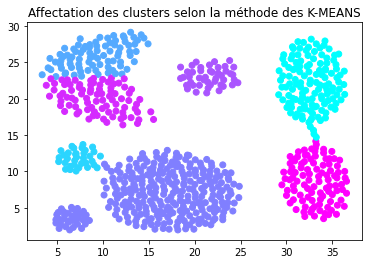

ARI : 0.8453016028415496


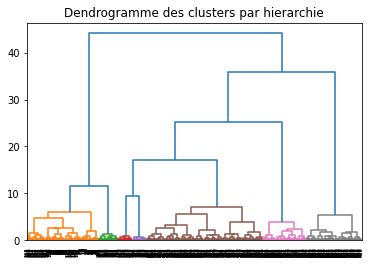

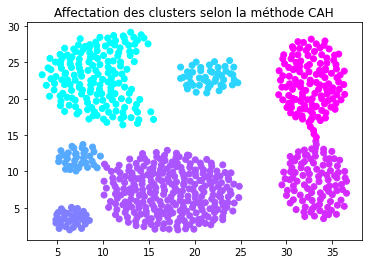

ARI : 1.0


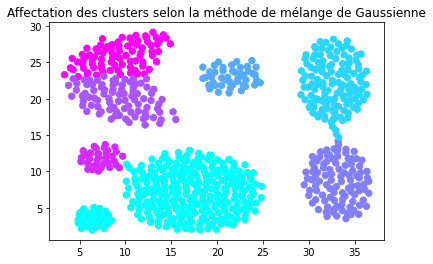

ARI : 0.8453220953746249


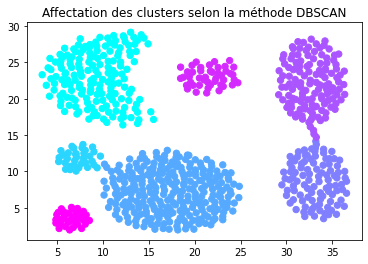

ARI : 1.0


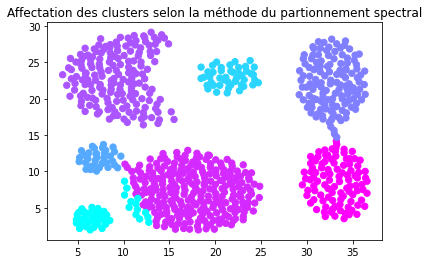

ARI : 0.9629919868544013


In [ ]:
# On centre et réduit les données

Xa = aggregation_np
scalerXa = StandardScaler()
scalerXa.fit(Xa)                # pour mettre X dans scaler
Za = scalerXa.transform(Xa)      # pour centrer et réduire
scalerZa = StandardScaler()
scalerZa.fit(Za)                # on remplace X

# Parametres pour les fonctions de clustering pour aggregation.txt
nb_clusters_a = 7
t_a = 8
eps_a = 0.6

from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Méthode de clustering KMeans

kmeans = KMeans(n_clusters=nb_clusters_a, init='random', n_init=1).fit(Za)
affectation_cluster_a = kmeans.labels_
inertie = kmeans.inertia_
ARI = adjusted_rand_score(aggregation_np[:,2], affectation_cluster_a)
plt.scatter(aggregation_np[:,0], aggregation_np[:,1], c=affectation_cluster_a, cmap='cool')
plt.title ('Affectation des clusters selon la méthode des K-MEANS')
plt.show()
print ("ARI : " + str(ARI))

# Métode de clustering CAH

linkage1 = linkage (Za, 'ward', 'euclidean', True)                          # on choisit la distance de Ward car plus précise
affectation_cluster_a_cah = fcluster (linkage1, t_a, criterion='distance')
ARI = adjusted_rand_score(aggregation_np[:,2], affectation_cluster_a_cah)
dendrogram (linkage1, color_threshold=t_a)
plt.title ('Dendrogramme des clusters par hierarchie')                                   # 20 représente le pas t auqeul on décide "couper" pour former les clusters
plt.show()
plt.scatter(aggregation_np[:,0], aggregation_np[:,1], c=affectation_cluster_a_cah, cmap='cool')
plt.title ('Affectation des clusters selon la méthode CAH')
plt.show()
print ("ARI : " + str(ARI))

# Méthode de clustering modèle de mélange de Gaussienne

gm = GaussianMixture(n_components=nb_clusters_a).fit(Za)
labels = gm.predict(Za)
ARI = adjusted_rand_score(aggregation_np[:,2], labels)
plt.scatter(aggregation_np[:, 0], aggregation_np[:, 1], c=labels, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode de mélange de Gaussienne')
plt.show()
print ("ARI : " + str(ARI))

# Méthode de clustering DBSCAN

dbscan = DBSCAN(eps=eps_a, min_samples=2).fit(Za)                             # eps=0.5 pour bons clusters, si on veut comparer méthodes mettre eps=0.3 on obtient 4 clusters et 1 anomalie
labels2 = dbscan.labels_
ARI = adjusted_rand_score(aggregation_np[:,2], labels2)
#print (labels2)                                                             # on obtient -1 lorsqu'il y a une anomalie
plt.scatter(aggregation_np[:, 0], aggregation_np[:, 1], c=labels2, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode DBSCAN')
plt.show()
print ("ARI : " + str(ARI))

# Méthode du partionnement spectral

spectralClustering = SpectralClustering(n_clusters=nb_clusters_a, assign_labels='discretize', random_state=0).fit(Za)
labels3 = spectralClustering.labels_
ARI = adjusted_rand_score(aggregation_np[:,2], labels3)
#print (labels3)
plt.scatter(aggregation_np[:, 0], aggregation_np[:, 1], c=labels3, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode du partionnement spectral')
plt.show()
print ("ARI : " + str(ARI))

## **Clustering sur le fichier pathbased.txt**

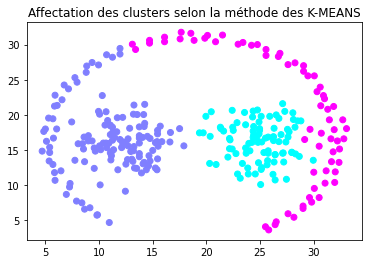

ARI : 0.6590419156487111


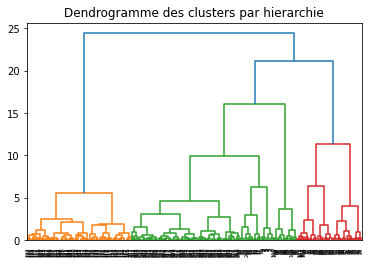

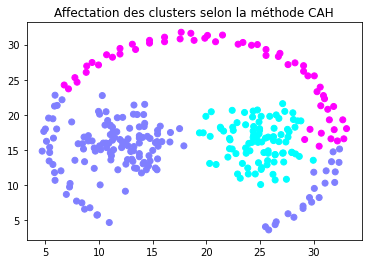

ARI : 0.6133697173846521


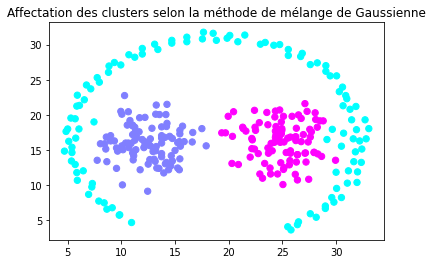

ARI : 1.0


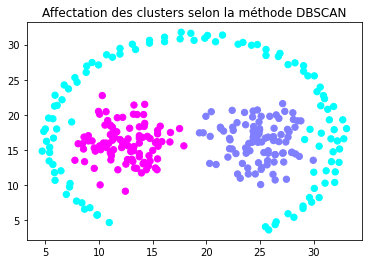

ARI : 1.0


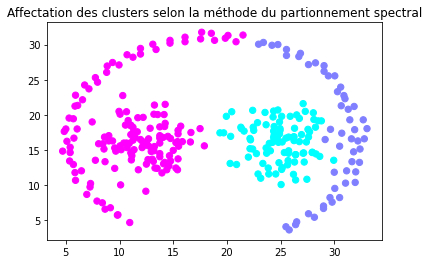

ARI : 0.592329377605969


In [ ]:
# On centre et réduit la matrice

Xp = pathbased_np
scalerXp = StandardScaler()
scalerXp.fit(Xp)                # pour mettre X dans scaler
Zp = scalerXp.transform(Xp)      # pour centrer et réduire
scalerZp = StandardScaler()
scalerZp.fit(Zp)                # on remplace X

# Parametres pour les fonctions de clustering pour aggregation.txt
nb_clusters_p = 3
t_p = 20
eps_p = 0.6

# Méthode de clustering KMeans

kmeans = KMeans(n_clusters=nb_clusters_p, init='random', n_init=1).fit(Zp)          # on définit le nombre de clusters à 2
affectation_cluster_p = kmeans.labels_
ARI = adjusted_rand_score(pathbased_np[:,2], affectation_cluster_p)
#print (affectation_cluster_p)
inertie = kmeans.inertia_
plt.scatter(pathbased_np[:,0], pathbased_np[:,1], c=affectation_cluster_p, cmap='cool')
plt.title ('Affectation des clusters selon la méthode des K-MEANS')
plt.show()
print ("ARI : " + str(ARI))

# Métode de clustering CAH

linkage1 = linkage (Zp, 'ward', 'euclidean', True)                          # on choisit la distance de Ward car plus précise
affectation_cluster_p_cah = fcluster (linkage1, t_p, criterion='distance')   # 20 représente le pas t auqeul on décide "couper" pour former les clusters
ARI = adjusted_rand_score(pathbased_np[:,2], affectation_cluster_p_cah)
dendrogram (linkage1, color_threshold=t_p)
plt.title ('Dendrogramme des clusters par hierarchie')                                   # 20 représente le pas t auqeul on décide "couper" pour former les clusters
plt.show()
plt.scatter(pathbased_np[:,0], pathbased_np[:,1], c=affectation_cluster_p_cah, cmap='cool')
plt.title ('Affectation des clusters selon la méthode CAH')
plt.show()
print ("ARI : " + str(ARI))

# Méthode de clustering modèle de mélange de Gaussienne

gm = GaussianMixture(n_components=nb_clusters_p).fit(Zp)
labels = gm.predict(Zp)
ARI = adjusted_rand_score(pathbased_np[:,2], labels)
plt.scatter(pathbased_np[:, 0], pathbased_np[:, 1], c=labels, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode de mélange de Gaussienne')
plt.show()
print ("ARI : " + str(ARI))

# Méthode de clustering DBSCAN

dbscan = DBSCAN(eps=eps_p, min_samples=2).fit(Zp)                             # eps=0.5 pour bons clusters, si on veut comparer méthodes mettre eps=0.3 on obtient 4 clusters et 1 anomalie
labels2 = dbscan.labels_
ARI = adjusted_rand_score(pathbased_np[:,2], labels2)
#print (labels2)                                                             # on obtient -1 lorsqu'il y a une anomalie
plt.scatter(pathbased_np[:, 0], pathbased_np[:, 1], c=labels2, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode DBSCAN')
plt.show()
print ("ARI : " + str(ARI))

# Méthode du partionnement spectral

spectralClustering = SpectralClustering(n_clusters=nb_clusters_p, assign_labels='discretize', random_state=0).fit(Zp)
labels3 = spectralClustering.labels_
ARI = adjusted_rand_score(pathbased_np[:,2], labels3)
#print (labels3)
plt.scatter(pathbased_np[:, 0], pathbased_np[:, 1], c=labels3, s=40, cmap='cool')
plt.title ('Affectation des clusters selon la méthode du partionnement spectral')
plt.show()
print ("ARI : " + str(ARI))